In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI
%matplotlib inline

In [2]:
%%writefile parallel_bifurcationv2.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpi4py import MPI


comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

start_time = MPI.Wtime()

def step(r,x):
    return r*x*(1-x)


def iterat_r(x0, r_min, r_max, m, n, steps):
    R = np.linspace(r_min,r_max, steps)
    X = list()
    R_list = list()
    for r in R:
        x = x0
        for i in range(m+n):
            if (i>n) and (x not in X):
                X.append(x)
                R_list.append(r)
            x = step(r,x)
    return X, R_list



dots = 1000//size
r_size = 4/size

    
x0 = 0.1
m = 20
n = 100
    

X, R = iterat_r(x0, r_size*(rank), r_size*(rank+1), m, n, dots)
data = comm.gather((X,R), root=0)

if rank == 0:
    R = list()
    X = list()
    for i in range(len(data)):
        R = np.concatenate((R,data[i][1]))
        X = np.concatenate((X,data[i][0])) 
    np.savetxt("X.csv", X, delimiter=",") 
    np.savetxt("R.csv", R, delimiter=",")  
    #print(MPI.Wtime()-start_time)
    print(f"Number of processes: {size} done")







Overwriting parallel_bifurcationv2.py


In [3]:
!mpiexec -np 3 python parallel_bifurcationv2.py

Number of processes: 3 done


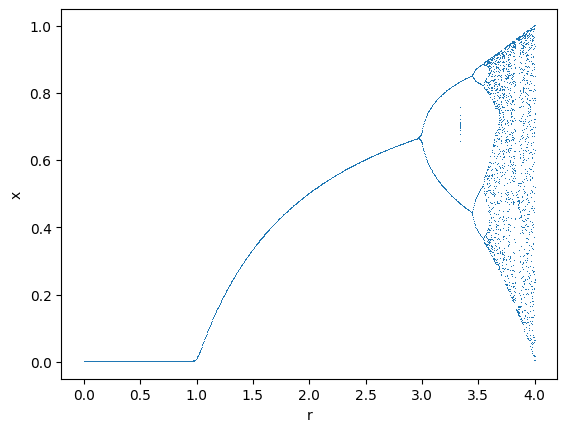

In [4]:
X = np.loadtxt("X.csv",delimiter = ',')
R = np.loadtxt("R.csv", delimiter = ',')
plt.plot(R, X, ls='', marker=',')
plt.xlabel('r')
plt.ylabel('x');

In [22]:
n = np.arange(1,9)
results = list()

for i in n:
    a = %timeit -o -r 3 !mpiexec -np {i} python parallel_bifurcationv2.py
    results.append(a.best)

Number of processes: 1
Number of processes: 1
Number of processes: 1
Number of processes: 1
3.31 s ± 49.5 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Number of processes: 2
Number of processes: 2
Number of processes: 2
Number of processes: 2
2.33 s ± 42.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Number of processes: 3
Number of processes: 3
Number of processes: 3
Number of processes: 3
2.3 s ± 57.7 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Number of processes: 4
Number of processes: 4
Number of processes: 4
Number of processes: 4
2.71 s ± 256 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Number of processes: 5
Number of processes: 5
Number of processes: 5
Number of processes: 5
3.16 s ± 61.7 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Number of processes: 6
Number of processes: 6
Number of processes: 6
Number of processes: 6
3.76 s ± 159 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Number of processes: 7
Number of processes:

In [27]:
res = list(map(lambda x: results[0]/x, results))

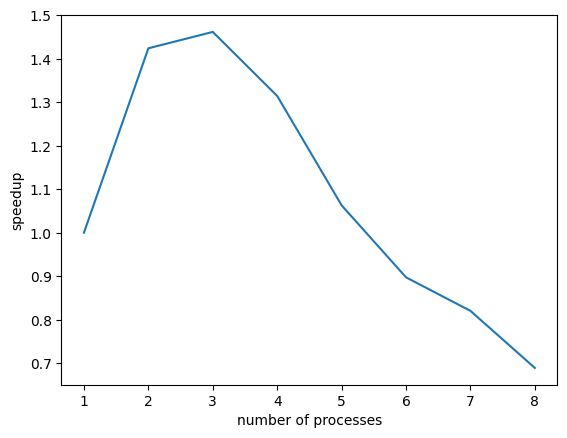

In [28]:
plt.plot(n,res)
plt.xlabel("number of processes")
plt.ylabel("speedup");